In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvYXB1cnZhL0RvY3VtZW50cy9Nb250ZS1DYXJsby1NZXRob2RzL2NoYXB0ZXJzL3NhbXBsaW5n'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_275285/2758755710.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/zipimport.py": 1733935783.8019211, "/home/apurva/miniconda3/lib/python3.12/codecs.py": 1733935783.6539242, "/home/apurva/miniconda3/lib/python3.12/encodings/aliases.py": 1733935783.917919, "/home/apurva/miniconda3/lib/python3.12/encodings/__init__.py": 1733935783.9739177, "/home/apurva/miniconda3/lib/python3.12/encodings/utf_8.py": 1733935784.0459163, "/home/apurva/miniconda3/lib/python3.12/abc.py": 1733935783.6419244, "/home/apurva/miniconda3/lib/python3.12/io.py": 1733935783.7019231, "/home/apurva/miniconda3/lib/python3.12/stat.py": 1733935783.765922, "/home/apurva/miniconda3/lib/python3.12/_collections_abc.py": 1733935783.6579242, "/home/apurva/miniconda3/lib/python3.12/genericpath.py": 1733935783.6859236, "/home/apurva/miniconda3/lib/python3.12/posixpath.py": 1733

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(0)

In [3]:
lags = 20
threshold = 0.1

# Correlation between X and Y
def autocorr(x, t):
  return np.corrcoef(x[:-t], x[t:])[0, 1]

n = 10 # burn-in period
N = 10000

In [4]:
class truncated_exponential:
    def __init__(self, lambda_, D):
        self.lambda_ = lambda_
        self.D = D

    def rvs(self, size=1):
        """Samples from a truncated exponential distribution over [0, D]"""
        U = np.random.uniform(0, 1, size)
        Z = -np.log(1 - U * (1 - np.exp(-self.lambda_ * self.D))) / self.lambda_
        return Z

    def pdf(self, x):
        """Computes the probability density function of the truncated exponential distribution."""
        return (self.lambda_ * np.exp(-self.lambda_ * x)) / (1 - np.exp(-self.lambda_ * self.D)) * (x >= 0) * (x <= self.D)


class truncated_2D_exponential:
    def __init__(self, lambda_, D1, D2):
        self.lambda_ = lambda_
        self.D1 = D1
        self.D2 = D2

    def X_given_Y(self, y):
        """Returns the conditional truncated exponential distribution P(X | Y=y)"""
        return truncated_exponential(self.lambda_ * y, self.D1)

    def Y_given_X(self, x):
        """Returns the conditional truncated exponential distribution P(Y | X=x)"""
        return truncated_exponential(self.lambda_ * x, self.D2)

    def rvs(self, size=1000):
        """Gibbs sampler for the truncated 2D exponential distribution"""
        X = np.zeros(size)
        Y = np.zeros(size)

        # Initialize Y randomly
        Y[0] = np.random.uniform(0, self.D2)  # Ensure it's within [0, D2]

        for i in range(1, size):
            # Sample X given the previous Y
            X[i] = self.X_given_Y(Y[i - 1]).rvs(size=1)[0]
            # Sample Y given the new X
            Y[i] = self.Y_given_X(X[i]).rvs(size=1)[0]

        return X, Y
    
    def pdf(self, x, y):
        """Computes the probability density function of the truncated 2D exponential distribution."""
        if x < 0 or x > self.D1 or y < 0 or y > self.D2:
            return 0
        return self.lambda_ ** 2 * np.exp(-self.lambda_ * (x + y)) / (1 - np.exp(-self.lambda_ * self.D1)) / (1 - np.exp(-self.lambda_ * self.D2))


# Parameters
lambda_ = 2
D1 = 5
D2 = 3
num_samples = 5000

# Generate samples
model = truncated_2D_exponential(lambda_, D1, D2)
X, Y = model.rvs(num_samples)

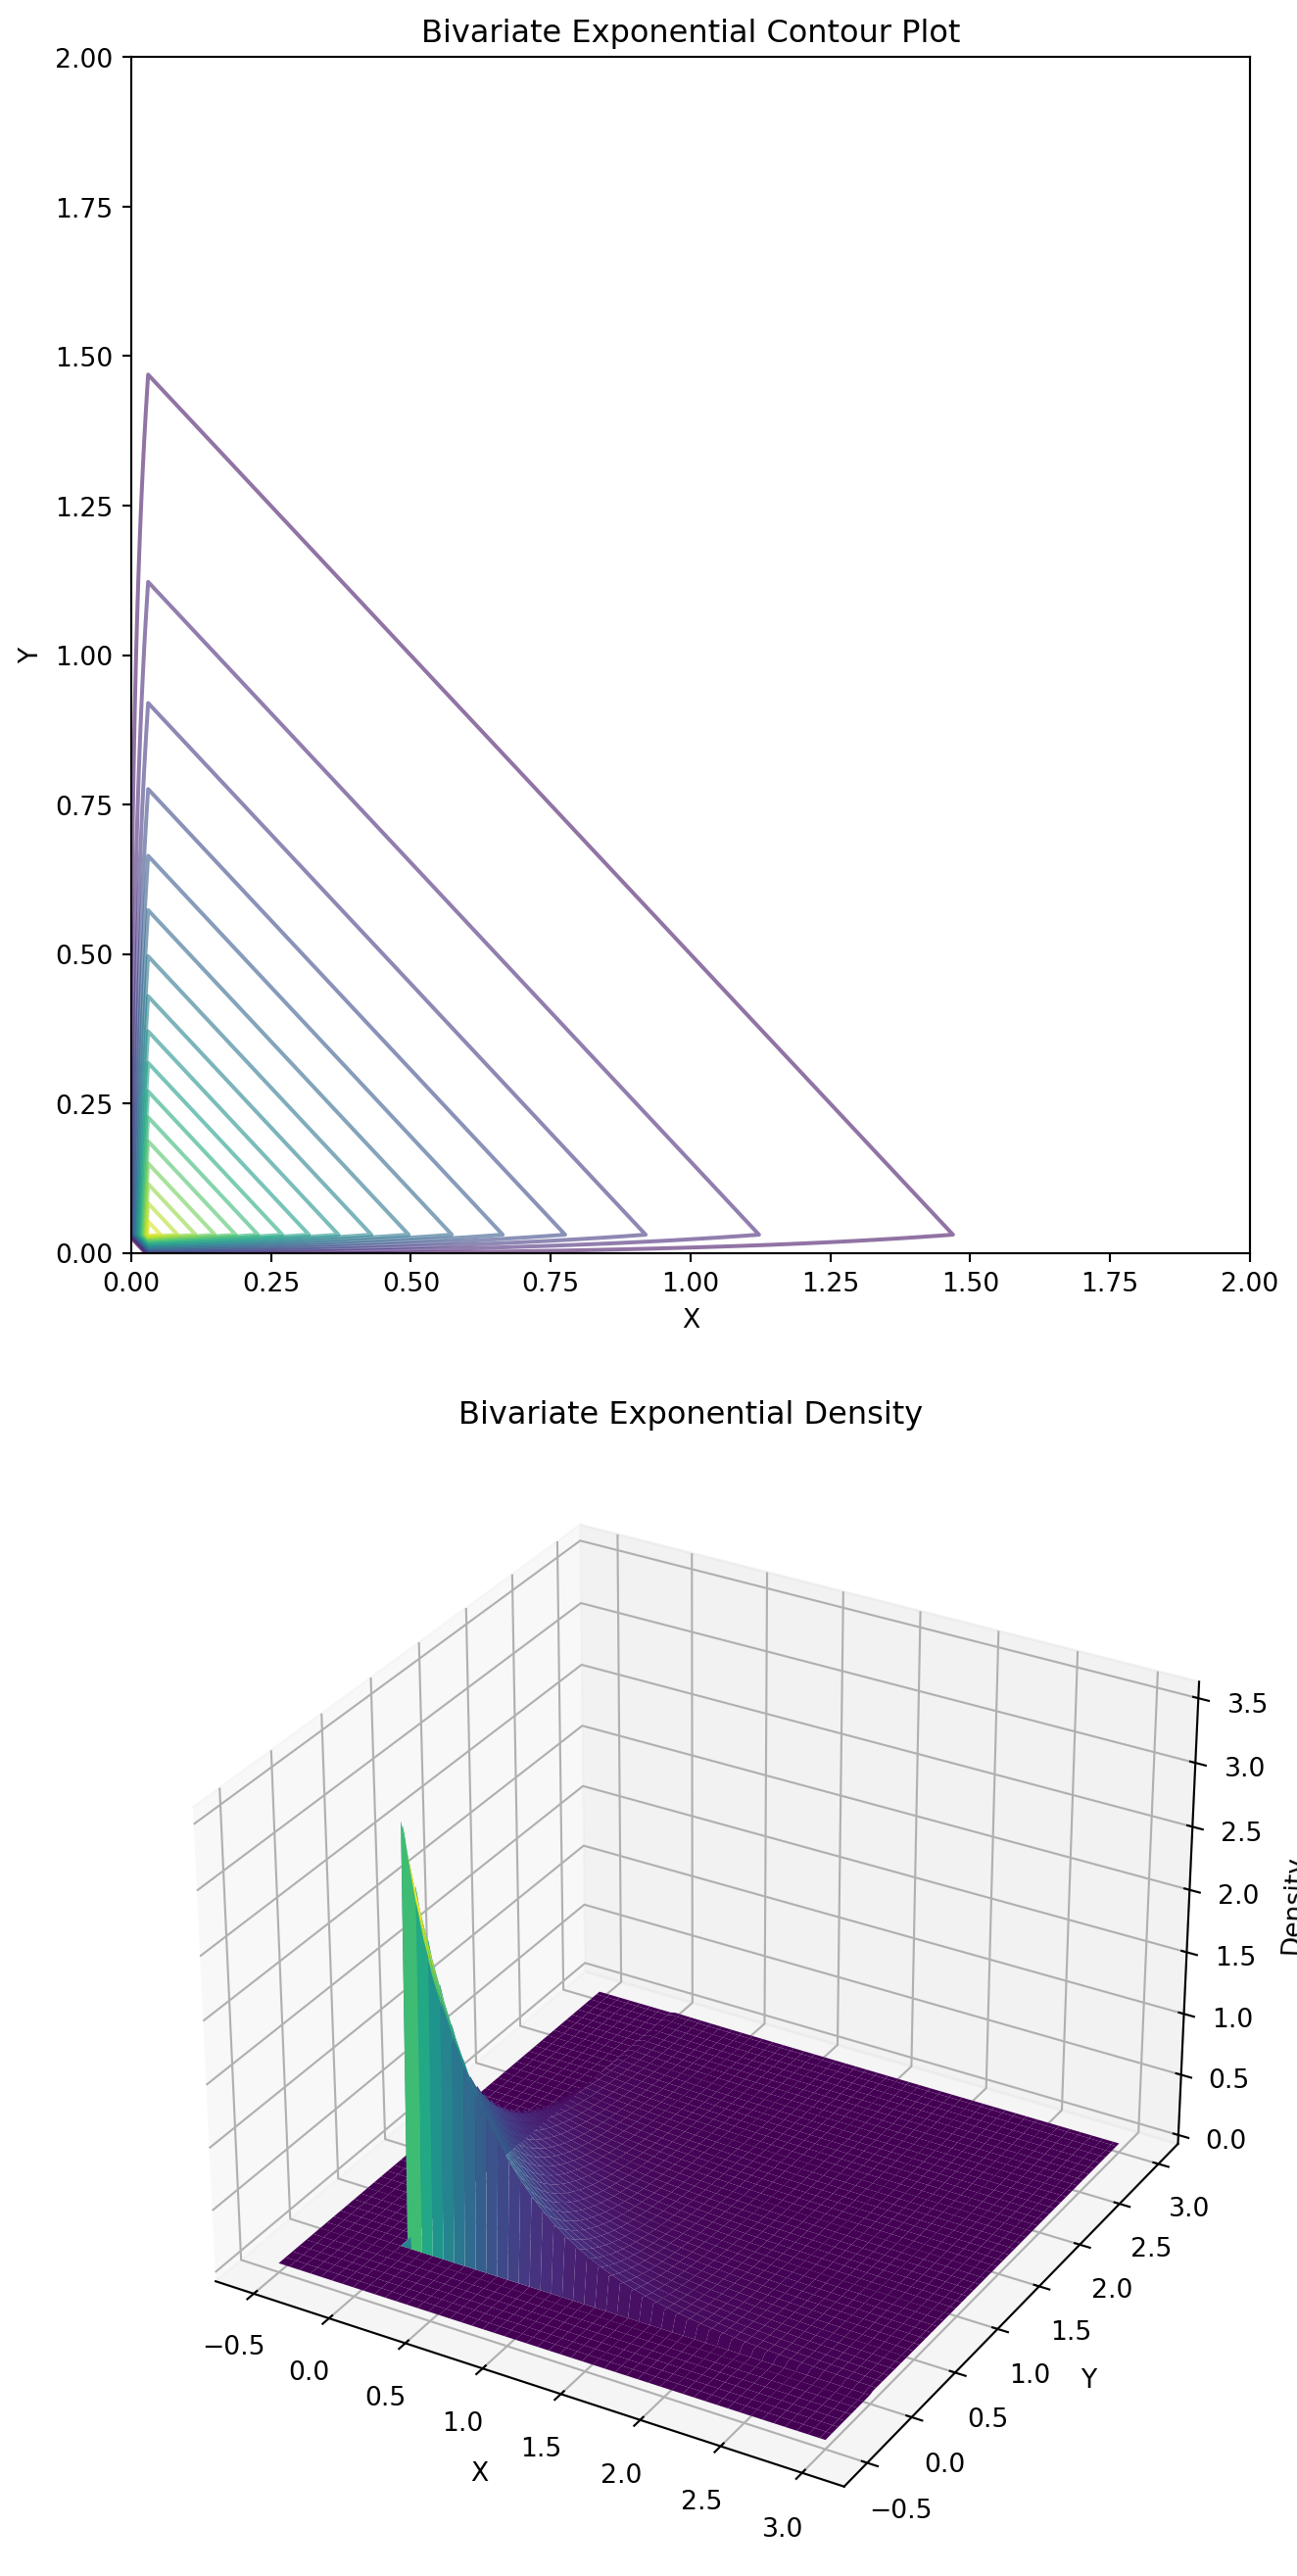

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# Assuming model.pdf is already defined
x = np.linspace(-0.5, 3, 100)
y = np.linspace(-0.5, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = np.array([[model.pdf(xi, yi) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

# Set figure width to 7 inches (700 px at 100 DPI), and height to 14 for vertical stacking
fig = plt.figure(figsize=(7, 14), tight_layout=True)

# First subplot: Contour plot (top)
ax1 = fig.add_subplot(211)
cp = ax1.contour(x, y, Z, levels=20, alpha=0.6)
ax1.set_xlim(0, 2)
ax1.set_ylim(0, 2)
ax1.set_title('Bivariate Exponential Contour Plot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Second subplot: 3D surface plot (bottom)
ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Density')
ax2.set_title('Bivariate Exponential Density')

plt.show()

In [6]:
def gibbs_sampler_exp(lambda_, D1, D2, x0=1.0, y0=1.0):
    X = np.zeros(N + 1)
    Y = np.zeros(N + 1)
    X[0] = x0
    Y[0] = y0
    for i in range(N):
        # Sample X given previous Y
        rate_x = lambda_ * Y[i] * D1
        # Prevent rate_x=0 division by zero
        if rate_x > 0:
            u = np.random.uniform()
            X[i+1] = -np.log(1 - u * (1 - np.exp(-rate_x))) / rate_x
        else:
            X[i+1] = 0.0

        # Sample Y given new X
        rate_y = lambda_ * X[i+1] * D2
        if rate_y > 0:
            u = np.random.uniform()
            Y[i+1] = -np.log(1 - u * (1 - np.exp(-rate_y))) / rate_y
        else:
            Y[i+1] = 0.0
    return X, Y

X, Y = gibbs_sampler_exp(lambda_, D1, D2)

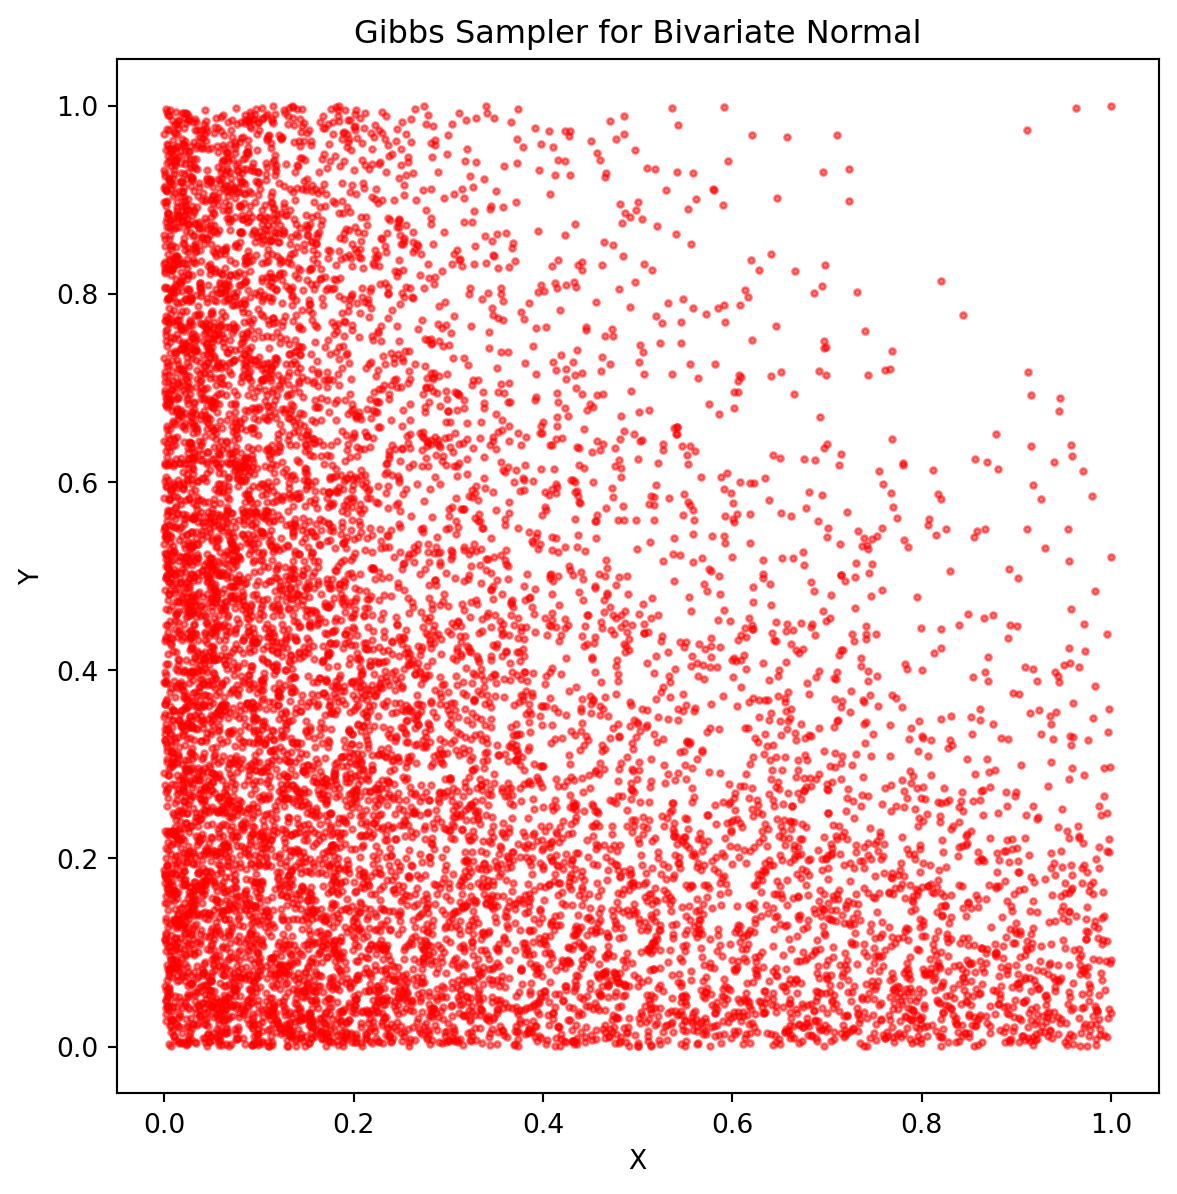

In [7]:
plt.figure(figsize=(7, 7))
plt.scatter(X, Y, alpha=0.5, color='r', s=5)
plt.title('Gibbs Sampler for Bivariate Normal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

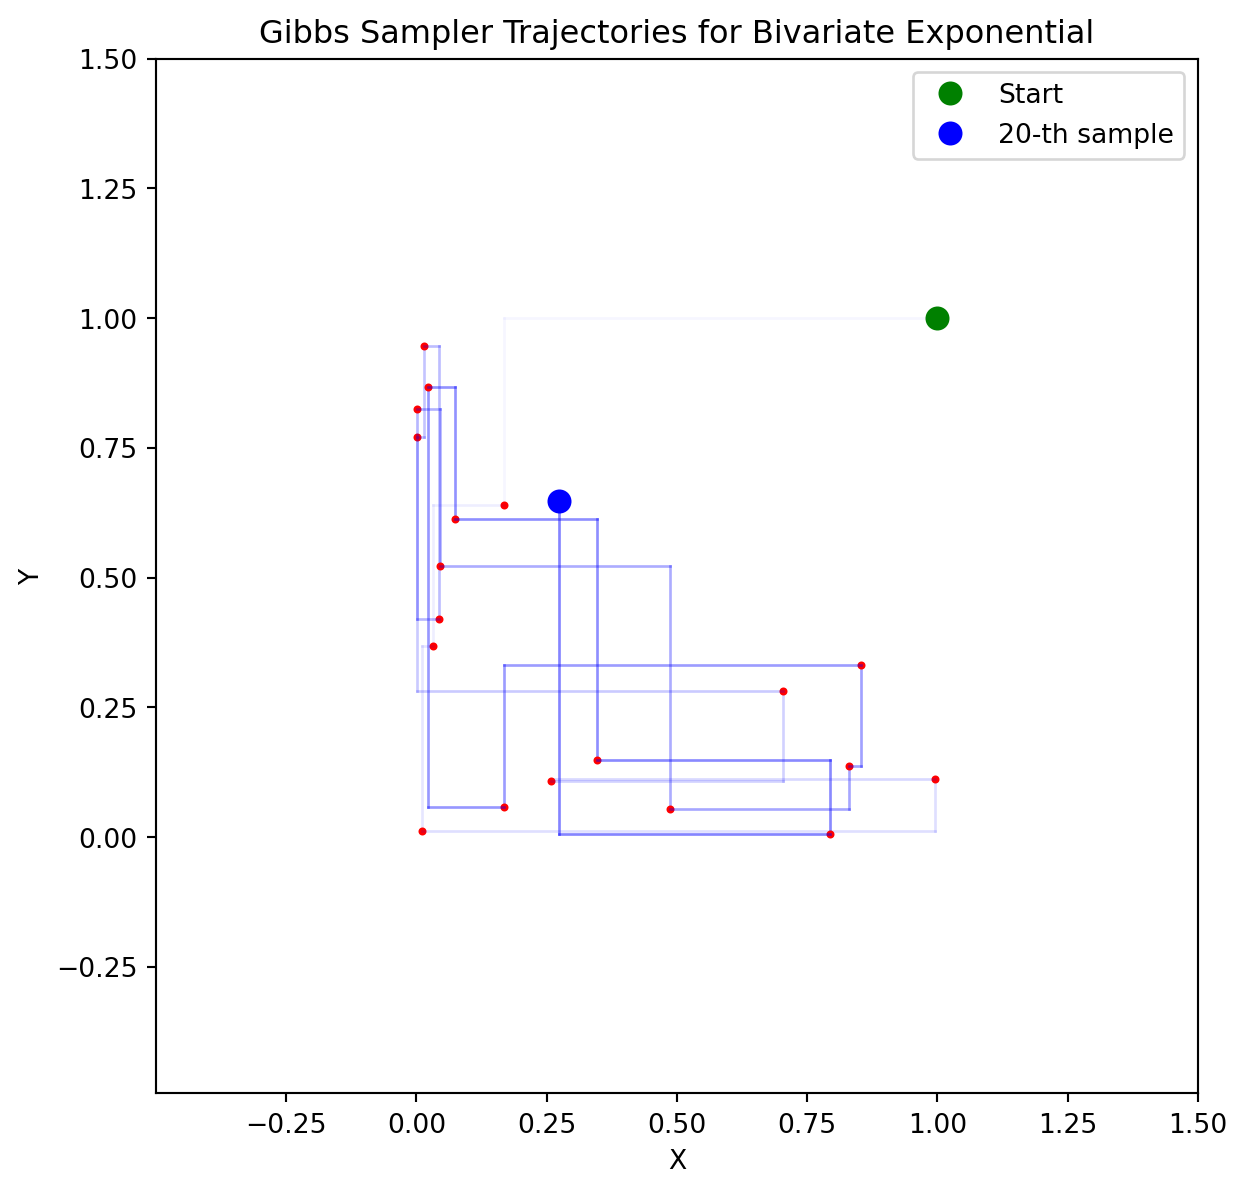

In [8]:
k = 20

plt.figure(figsize=(7, 7))  # 7 inches wide = 672 px at default 96 DPI

plt.xlim(min(X[:k])-0.5, max(Y[:k])+0.5)
plt.ylim(min(Y[:k])-0.5, max(X[:k])+0.5)

for i in range(k + 1):
    if i > 0:
        alpha = np.log(1 + (i / k)) * np.log(2)
        plt.plot([X[i - 1], X[i]], [Y[i - 1], Y[i - 1]], 'b-', linewidth=1, alpha=alpha)
        plt.plot([X[i], X[i]], [Y[i - 1], Y[i]], 'b-', linewidth=1, alpha=alpha)
    plt.plot(X[i], Y[i], 'ro', markersize=2)

# Start and end points
plt.plot(X[0], Y[0], 'go', markersize=8, label='Start')
plt.plot(X[k], Y[k], 'bo', markersize=8, label=f'{k}-th sample')
plt.legend()

plt.title('Gibbs Sampler Trajectories for Bivariate Exponential')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

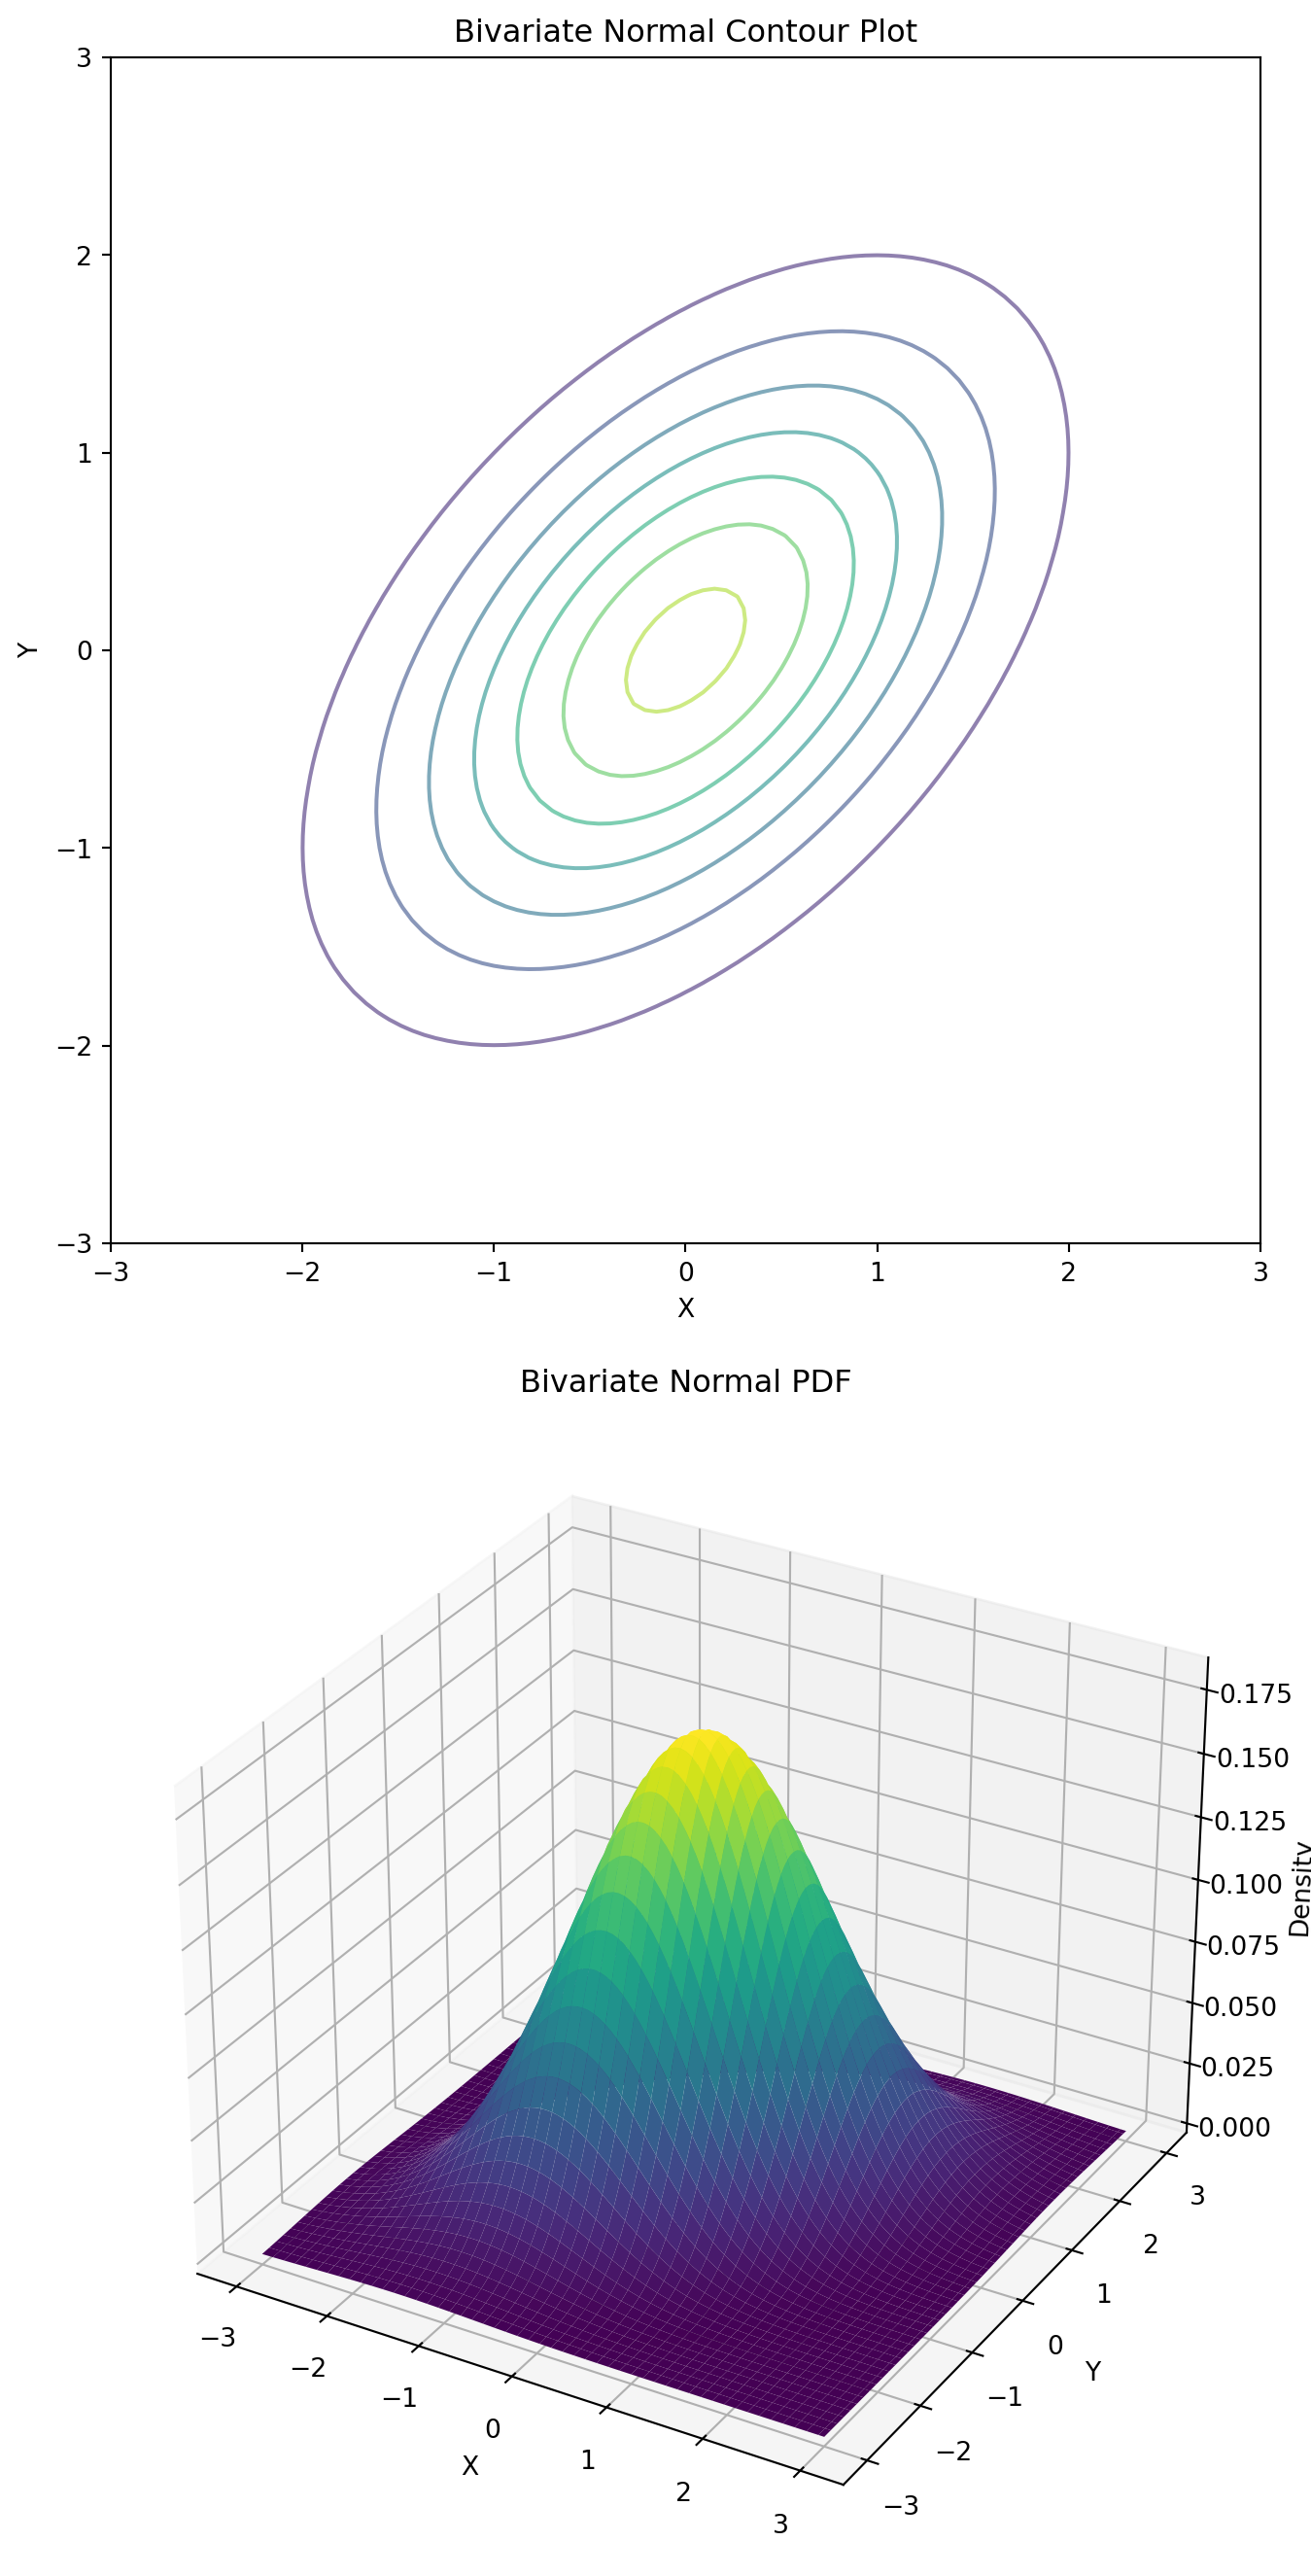

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plots

rho = 0.5
rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])

# 3D plot of the bivariate normal distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = rv.pdf(pos)

fig = plt.figure(figsize=(7, 14), tight_layout=True)

# Top subplot: Contour plot
ax1 = fig.add_subplot(211)
ax1.contour(x, y, Z, alpha=0.6)
ax1.set_title('Bivariate Normal Contour Plot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Bottom subplot: 3D surface plot
ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Density')
ax2.set_title('Bivariate Normal PDF')

plt.show()

In [10]:
def gibbs_sampler(rho, N):
  # In Gibbs we have a 100% acceptance rate
  X = np.zeros(N + 1) 
  Y = np.zeros(N + 1)
  for i in range(N): #np.arange(0,N,1):
    X[i+1] = rho * Y[i] + np.sqrt(1-rho**2) * np.random.normal(0,1)
    Y[i+1] = rho * X[i+1] + np.sqrt(1-rho**2) * np.random.normal(0,1)
  return X, Y

X, Y = gibbs_sampler(rho, N)

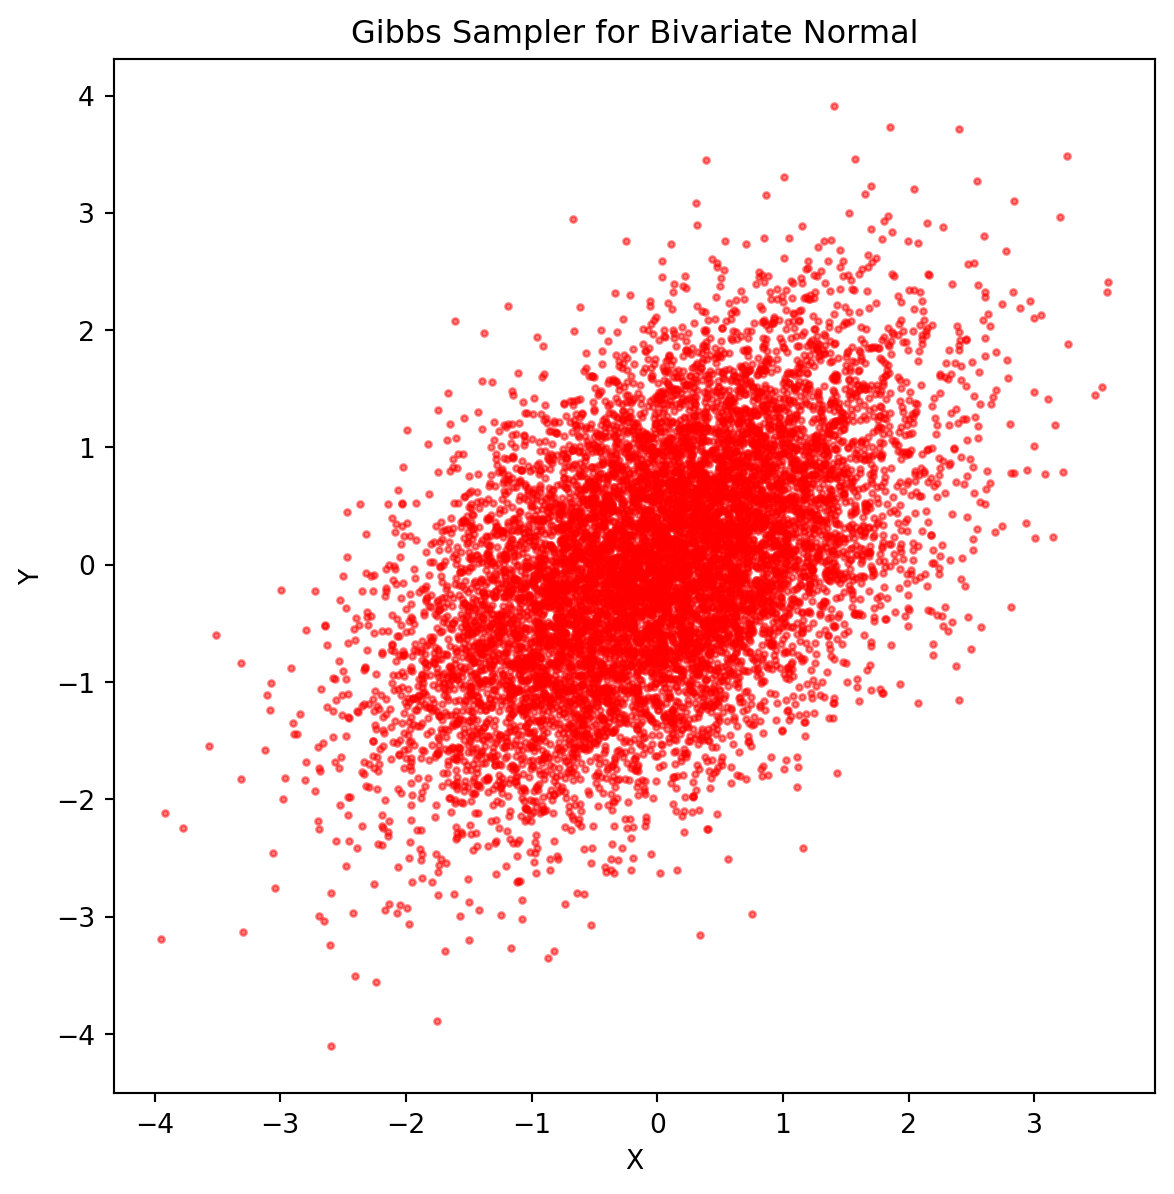

In [11]:
plt.figure(figsize=(7, 7))
plt.scatter(X, Y, alpha=0.5, color='r', s=5)
plt.title('Gibbs Sampler for Bivariate Normal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

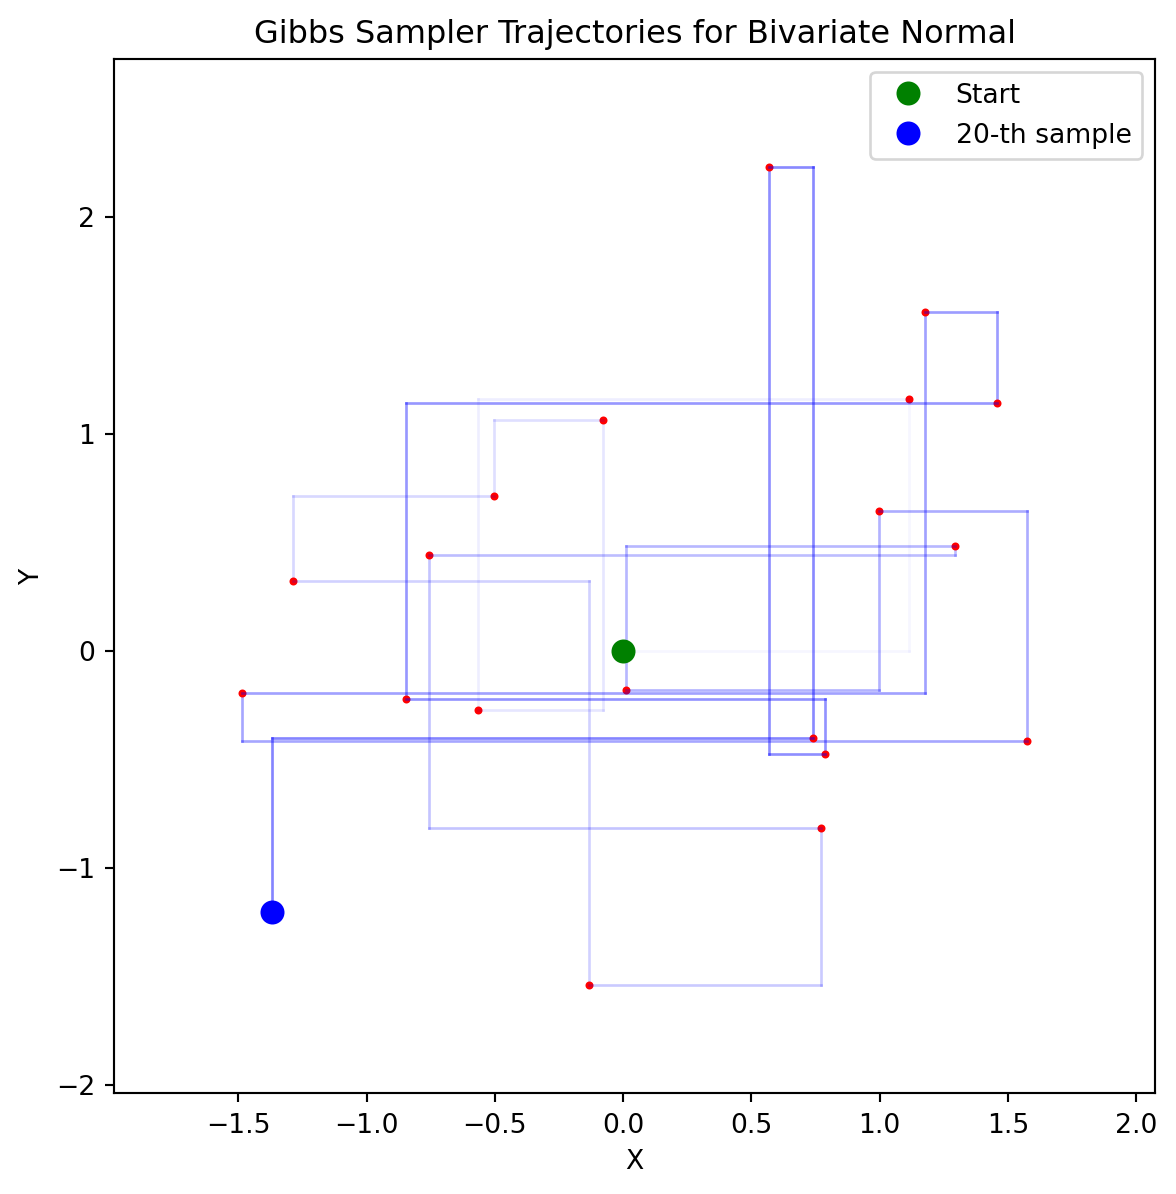

In [12]:
k = 20

plt.figure(figsize=(7, 7))  # 7 inches wide = 700px at 100 DPI

plt.xlim(min(X[:k]) - 0.5, max(X[:k]) + 0.5)
plt.ylim(min(Y[:k]) - 0.5, max(Y[:k]) + 0.5)

for i in range(k + 1):
    if i > 0:
        alpha = np.log(1 + (i / k)) * np.log(2)
        plt.plot([X[i - 1], X[i]], [Y[i - 1], Y[i - 1]], 'b-', linewidth=1, alpha=alpha)
        plt.plot([X[i], X[i]], [Y[i - 1], Y[i]], 'b-', linewidth=1, alpha=alpha)
    plt.plot(X[i], Y[i], 'ro', markersize=2)

# Mark start and end points
plt.plot(X[0], Y[0], 'go', markersize=8, label='Start')
plt.plot(X[k], Y[k], 'bo', markersize=8, label=f'{k}-th sample')
plt.legend()

plt.title('Gibbs Sampler Trajectories for Bivariate Normal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()